## Chaos Experiment

Warren Li

March 20, 2017

In [2]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import numpy as np
import math
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from IPython.display import HTML
from ipywidgets import interact
from ipywidgets import FloatSlider
output_notebook()

Loading BokehJS ...

### One-Dimensional Map
This circuit implements the following recursive equation:
    
$$
X_{n+1} = 1-AX_{n}^2
$$

![](chaos_1.png)

### Two-Phase Clock
![](chaos_2.png)

### Circuit Analysis

![](chaos_9.png)

### First Birfucation Point

Given $X_{n+1} = 1 - AX_n^2$, we can find the fixed points $x^*$ since $x^* = f(x^*)$.

$$x = 1-Ax^2$$

$$ x^* = \frac{-1 \pm \sqrt{1+4A}}{2A}$$

Stability Analysis:
$$f'(x) = -2Ax$$

$$f'(x^*) = -2A\bigg(\frac{-1 \pm \sqrt{1+4A}}{2A}\bigg) = -1$$

$$1 \pm \sqrt{1+4A} = -1$$

$$ A=\frac{3}{4}$$
Therefore, a flip bifurcation (period doubling) occurs when $A=0.75$.

In [3]:
def update(A=0.5):
    X = 0.2
    iterations = np.arange(100)
    values = np.empty(len(iterations))
    fig = figure(plot_height=300, plot_width=600)

    for i in iterations:
        X = 1 - A * X ** 2.0
        values[i] = X
        
    plt.plot(iterations, values)
    plt.show()

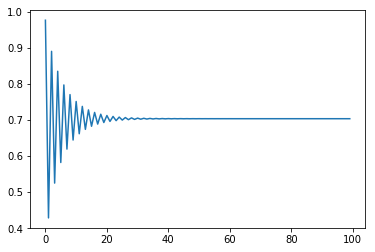

In [4]:
update(0.6)

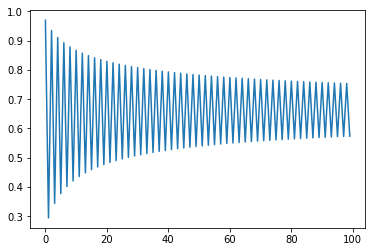

In [5]:
update(0.75)

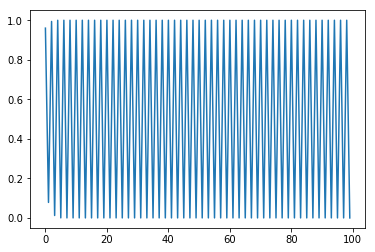

In [6]:
update(1.00)

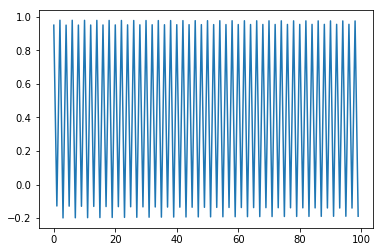

In [7]:
update(1.25)

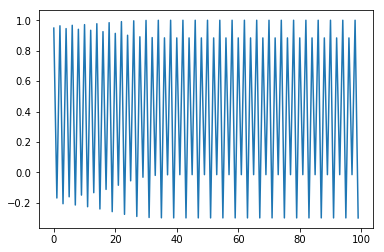

In [8]:
update(1.30)

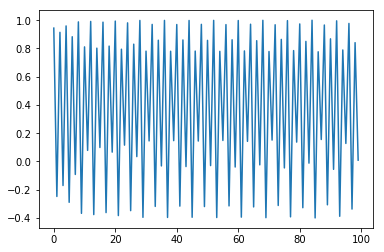

In [9]:
update(1.40)

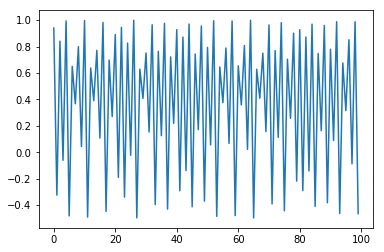

In [10]:
update(1.5)

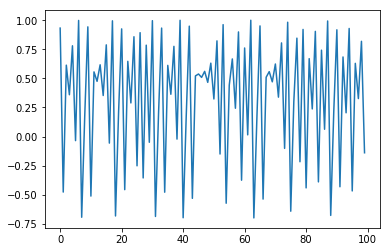

In [11]:
update(1.7)

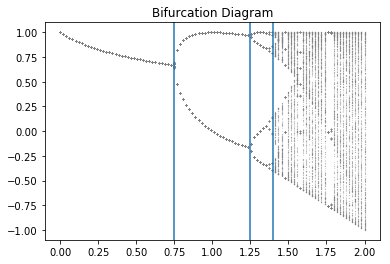

In [12]:
A = np.linspace(0, 2, 100)
X = np.full((len(A),), 0.2)
iterations = 800
cutoff = 300

for i in range(iterations):
    X = 1 - A * X ** 2.0
    if i > cutoff:
        plt.plot(A, X, '.', color='gray', markersize=0.2)
        
plt.title('Bifurcation Diagram')
plt.axvline(x=0.75)
plt.axvline(x=1.25)
plt.axvline(x=1.40)
plt.show()

### Results
<table>
    <tr>
        <td><img src="chaos_3a.jpg"></td>
        <td><img src="chaos_6a.jpg"></td>
        <td><img src="chaos_6b.jpg"><span>$A=1.00$ (Error: 33%)<br>$A=0.75$ (calculated)</td>
    </tr>
    <tr>
        <td><img src="chaos_3b.jpg"></td>
        <td><img src="chaos_6c.jpg"><span>$A=1.62$ (Error: 30%)<br>$A=1.25$ (calculated)</td>
        <td><img src="chaos_6d.jpg">$A=1.78$ (Error: 27%)<br>$A=1.40$ (calculated)</td>
    </tr>
</table>

In [13]:
HTML("""
<video width="640" height="480" controls>
  <source src="chaos_mov2.mp4" type="video/mp4">
</video>
""")

### Driven Harmonic Oscillator

This circuit describes the following nonlinear differential equation:

$$ \ddot{x} = -k\dot{x} - x^3 - A \sin{\omega t} $$

<table>
    <tr>
        <td><img src="chaos_4.jpg" width="600px"></td>
        <td><img src="chaos_7.jpg" width="500px"></td>
    </tr>
</table>

### Operational Amplifiers
![](chaos_5.png)

In [14]:
HTML("""
<video width="640" height="480" controls>
  <source src="moonbeam.mp4" type="video/mp4">
</video>
""")

### Potential

The potential $V(x)$ is defined by:

$$
f(x) = -\frac{dV}{dx}
$$

This circuit is very similar to the Duffing Oscillator, $\ddot{x} + \delta\dot{x} + \beta x + \alpha x^3 = C \cos{ (\omega t)}$, which has the following double-well potential and phase portrait (orbit passing through (3,4) with $t=0, \delta=0.05$, $\beta=0$, $\alpha=1$, and $C=7.5$). 

<table>
    <tr>
        <td><img src="chaos_8.png" width="500px"></td>
        <td><img src="duffing_animation.gif" width="500px"></td>
    </tr>
</table>

In [15]:
HTML("""
<video width="640" height="480" controls>
  <source src="chaos_mov1.mp4" type="video/mp4">
</video>
""")

In [16]:
%matplotlib inline
#change in x "velocity"
def f(v):
    return v

#change in v "acceleration"
def g(x, v, i, t, k, A):
    w = 1.5
    return (-1 * k * v) - x ** 3 - (A * math.sin(w * t[i]))

#second-order numerical integration
def euler_integration(x_init, v_init, num_iter, k=0.5, A=0.2):
    x = x_init
    v = v_init

    #time step
    dt = 0.1
    iterations = num_iter
    t = np.linspace(0, dt * iterations, iterations)

    #plotting parameters
    X = np.empty((iterations,))
    Y = np.empty((iterations,))
    cutoff = 1200 #remove transient points

    X[0] = x
    Y[0] = v

    for i in range(1, iterations):
        x_trial = x + f(v) * dt
        v_trial = v + g(x, v, i, t, k, A) * dt
        x_0 = x
        v_0 = v

        x = x_0 + 0.5 * (f(v_0) + f(v_trial)) * dt
        v = v_0 + 0.5 * (g(x_0, v_0, i, t, k, A) + g(x_0, v_trial, i, t, k, A)) * dt

        X[i] = x
        Y[i] = v
        
    axis.plot(X[cutoff:], Y[cutoff:])      

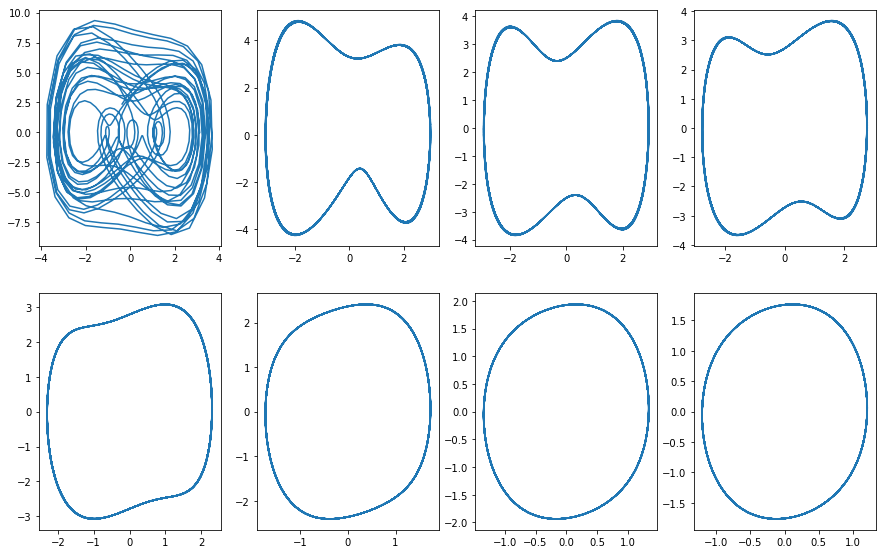

In [17]:
fig = plt.figure(figsize=(15,20))
k = [0.5, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 5.5]
for i in range(1, len(k) + 1):
    axis = fig.add_subplot(4, 4, i)
    euler_integration(1, 1, 2000, k[i-1], 10)

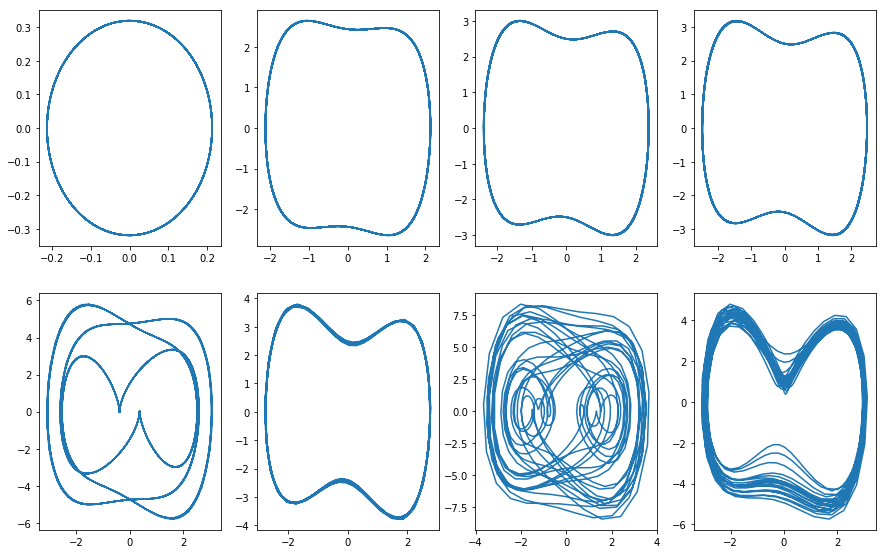

In [18]:
fig = plt.figure(figsize=(15,20))
A = [0.5, 2.1, 3.7, 4.5, 5.0, 7.0, 7.7, 8.5]
for i in range(1, len(A) + 1):
    axis = fig.add_subplot(4, 4, i)
    euler_integration(1, 1, 2000, 0.5, A[i-1])

In [19]:
HTML("""
<video width="640" height="480" controls>
  <source src="chaos_mov3.mp4" type="video/mp4">
</video>
""")

### References

T. Mishina, T. Kohmoto, and T. Hashi, _Am. J. Phys_. **53** (1985) 332-334

http://www.resistorguide.com/potentiometer/

http://www.analog.com/media/en/technical-documentation/data-sheets/AD534.pdf

http://www.circuitstoday.com/sample-and-hold-circuit

https://www.math.hmc.edu/~jacobsen/demolab/moonbeam.html

http://www.electronics-tutorials.ws/opamp/opamp_4.html

https://www.facstaff.bucknell.edu/mastascu/eLessonsHTML/OpAmps/OpAmp2.html

http://guillaumecantin.pythonanywhere.com/animation/1/

http://physics.ucsc.edu/~peter/115/duffing.pdf